### K-Means Clustering

This notebook contains a basic k-means clustering algorithm on the Iris dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# load the Iris dataset
df = pd.read_csv('iris.csv')
df.drop('class', axis=1, inplace=True)
df.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


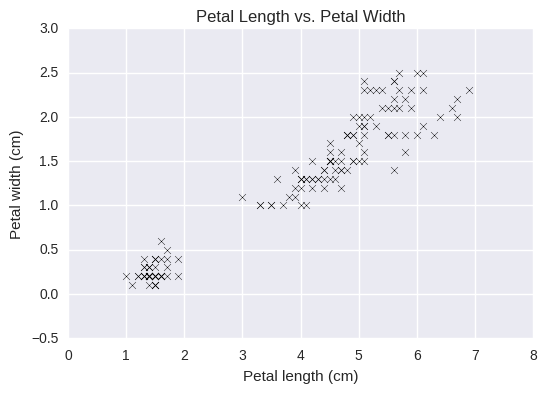

In [11]:
plt.scatter(df["petallength"], df["petalwidth"], c="k", marker="x", s=25)
plt.title("Petal Length vs. Petal Width")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

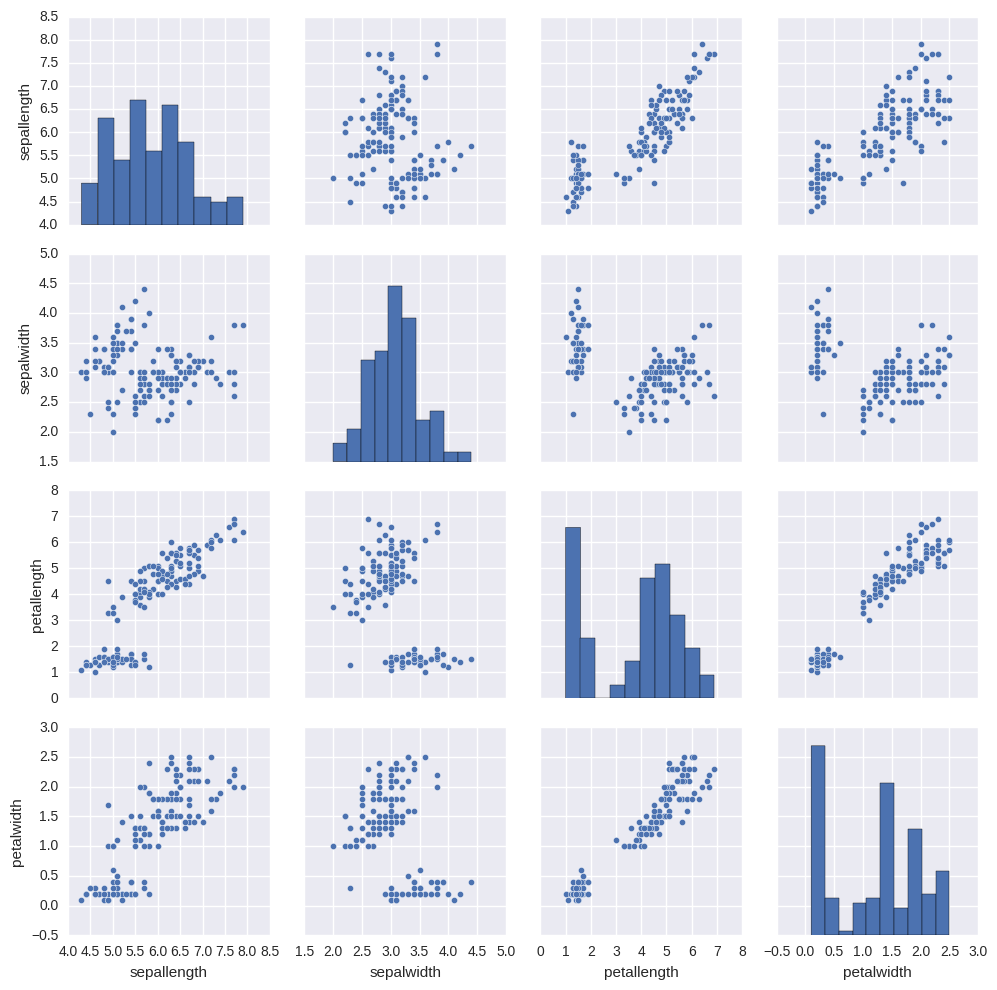

In [3]:
# plot the raw data
sns.pairplot(df)
plt.show()

### Step 1 - Initialisation

In [4]:
k = 3
centroids = []
clusters = []

# random initialisation of centroids = pick K data points at random as centroids
init_centroids = np.random.choice(range(len(df)), size=k, replace=False)

for i in init_centroids:
    # get the data point at index i
    pt = df.iloc[i,:]
    # append it to the centroids list
    centroids.append(pt.values)

### Step 2 - Learning

In [5]:
n_iterations = 20

def assign_to_cluster(idx):
    point = df.iloc[idx,0:4]
    # calculate distance (without sqrt) to each centroid
    distances = []
    for c in centroids:
        distances.append(((point - np.array(c)) ** 2).sum())
    # find index of closest cluster
    closest = np.argmin(distances)
    # assign point to that cluster
    clusters[closest].append(point.values)
    df.loc[idx,'cluster'] = closest

for _ in range(n_iterations):
    # first, reset the clusters
    clusters = []
    for i in range(k):
        clusters.append([])
    # assign each data point to nearest cluster
    for i in range(len(df)):
        assign_to_cluster(i)
    
    # now, recalculate the centroids
    for i in range(k):
        centroids[i] = np.array(clusters[i]).mean(axis=0)

Plot in 2-D

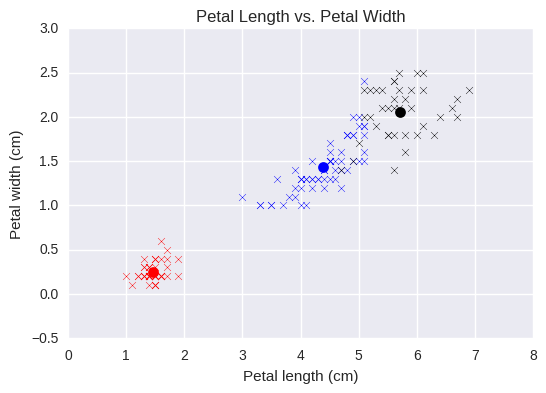

In [12]:
# plot points coloured by their clusters
# and mark cluster centroids
fig, ax = plt.subplots()
colours = ['b', 'r', 'k', 'm', 'g']
for i in range(len(clusters)):
    ax.scatter([x[2] for x in clusters[i]], [y[3] for y in clusters[i]], c=colours[i], s=25, marker='x')
    
for i in range(len(centroids)):
    ax.scatter(centroids[i][2], centroids[i][3], c=colours[i], marker='o', s=60, linewidth=0)

ax.set_title("Petal Length vs. Petal Width")
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
plt.show()

Plot all the dimensions to get a better view of the clusters

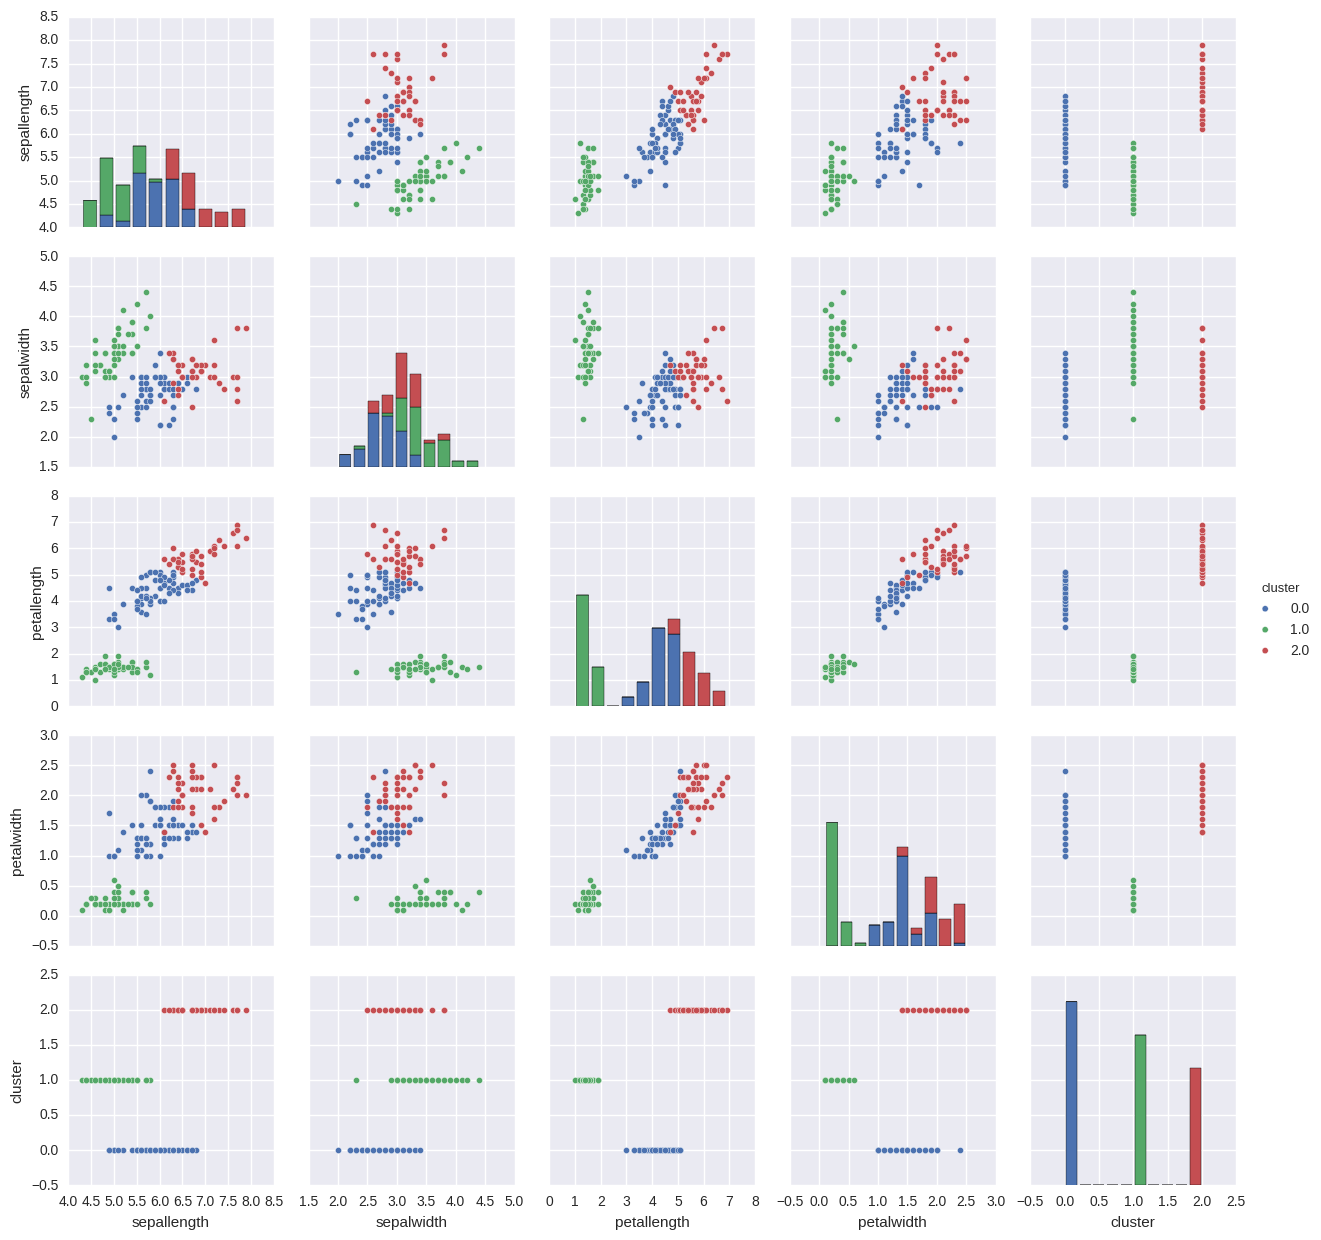

In [7]:
sns.pairplot(df, hue='cluster')
plt.show()